# 2020 Kaggle Machine Learning & Data Science Survey


이 설문조사의 결과를 바탕으로 데이터 사이언스와 머신러닝과 관련된 자료를 얻어볼 수 있지 않을까 하여 분석을 진행하도록 하겠다

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
pwd

'/home/mini/Videos/mini_n'

In [5]:
respone = pd.read_csv('./source/kaggle_survey_2020_responses.csv')
respone.shape

(20037, 355)

In [7]:
respone.head(3)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
respone.tail(3)

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN
20036,1031,22-24,Man,Pakistan,Master’s degree,Machine Learning Engineer,< 1 years,Python,NaN,NaN,...,Weights & Biases,NaN,NaN,NaN,NaN,NaN,Trains,NaN,NaN,NaN


In [9]:
respone.columns

Index(['Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7_Part_1', 'Q7_Part_2', 'Q7_Part_3',
       ...
       'Q35_B_Part_2', 'Q35_B_Part_3', 'Q35_B_Part_4', 'Q35_B_Part_5',
       'Q35_B_Part_6', 'Q35_B_Part_7', 'Q35_B_Part_8', 'Q35_B_Part_9',
       'Q35_B_Part_10', 'Q35_B_OTHER'],
      dtype='object', length=355)

<AxesSubplot:>

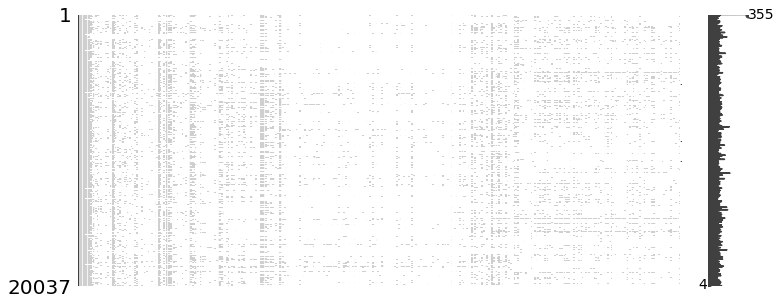

In [13]:
# Nan값 데이터들에 대해 시각화
import missingno as msno
msno.matrix(respone, figsize=(12,5))

20037명의 355개의 문제에 대한 응답의 데이터가 들어있다

## 설문통계

<AxesSubplot:xlabel='count', ylabel='Q2'>

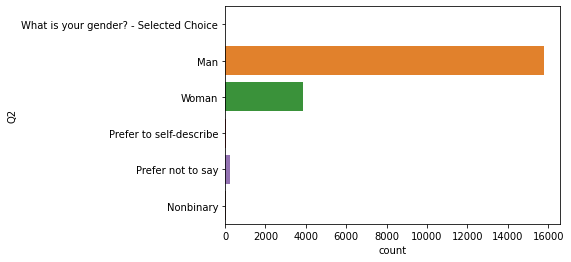

In [17]:
# 성별
sns.countplot(y='Q2', data=respone)

설문조사에는 여성보다 남성의 비율이 높다

In [24]:
# 국가
con_df = pd.DataFrame(respone['Q3'].value_counts())
# print(con_df)
# 인덱스를 columns로 지정해준다
con_df['country']= con_df.index
# columns의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['res', 'country']
# del index columns / 순위를 알기위해 reset_index를 해준다
con_df = con_df.reset_index().drop('index', axis=1)
# 어느나라 사람들이 많이 올렸는지 내림차순으로 20위까지 출력
con_df.head(20)

,res,country
0,5851,India
1,2237,United States of America
2,1388,Other
3,694,Brazil
4,638,Japan
5,582,Russia
6,489,United Kingdom of Great Britain and Northern I...
7,476,Nigeria
8,474,China
9,404,Germany


In [25]:
# 연령에 대한 정보를 본다
respone['Q1'].describe()

count     20037
unique       12
top       25-29
freq       4011
Name: Q1, dtype: object

In [26]:
respone['Q1'].value_counts()

25-29                          4011
22-24                          3786
18-21                          3469
30-34                          2811
35-39                          1991
40-44                          1397
45-49                           988
50-54                           698
55-59                           411
60-69                           398
70+                              76
What is your age (# years)?       1
Name: Q1, dtype: int64

25~29세의 나이대의 캐글러들이 설문을 많이 했다

<AxesSubplot:xlabel='count', ylabel='Q4'>

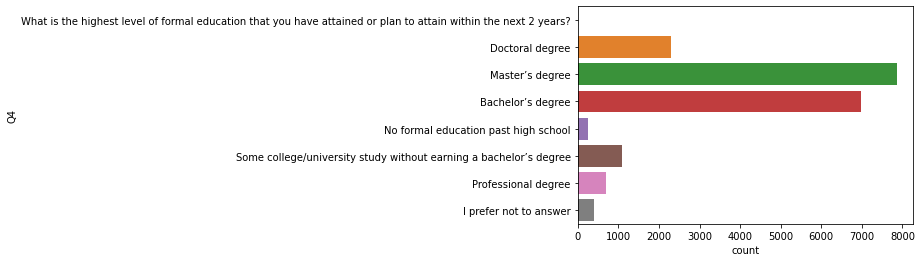

In [33]:
# 학력
sns.countplot(y='Q4', data=respone)

In [34]:
# 직업
respone['Q5'].value_counts()

Student                                                                                                    5171
Data Scientist                                                                                             2676
Software Engineer                                                                                          1968
Other                                                                                                      1737
Currently not employed                                                                                     1652
Data Analyst                                                                                               1475
Research Scientist                                                                                         1174
Machine Learning Engineer                                                                                  1082
Business Analyst                                                                                        

In [41]:
job_count = pd.DataFrame(respone['Q5'].value_counts())
job_percent = pd.DataFrame(respone['Q5'].value_counts(normalize=True))
job_df = job_count.merge(job_percent, left_index=True, right_index=True)
job_df.columns = ['counts', 'percent']
job_df

,counts,percent
Student,5171,0.268233
Data Scientist,2676,0.138811
Software Engineer,1968,0.102085
Other,1737,0.090103
Currently not employed,1652,0.085694
Data Analyst,1475,0.076512
Research Scientist,1174,0.060898
Machine Learning Engineer,1082,0.056126
Business Analyst,798,0.041394
Product/Project Manager,692,0.035896


<AxesSubplot:xlabel='count', ylabel='Q5'>

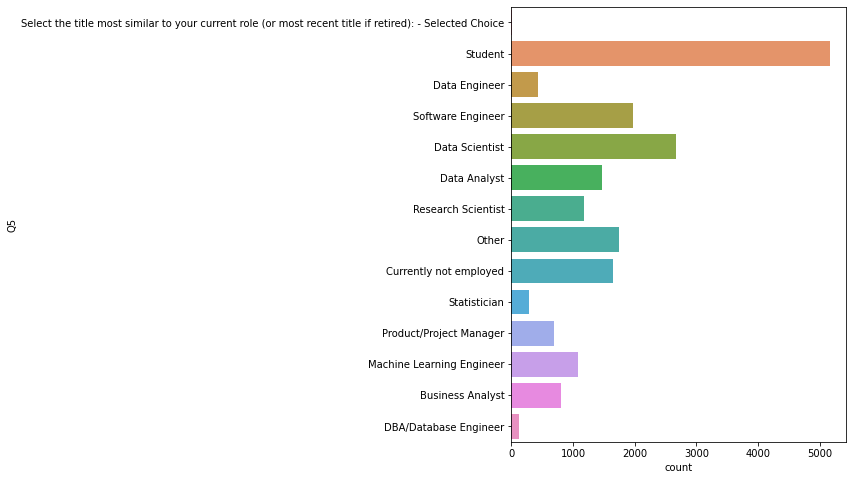

In [97]:
plt.figure(figsize=(6,8))
sns.countplot(y='Q5', data=respone)

학생 캐글인들이 설문작성을 많이 했다

<AxesSubplot:xlabel='count', ylabel='Q6'>

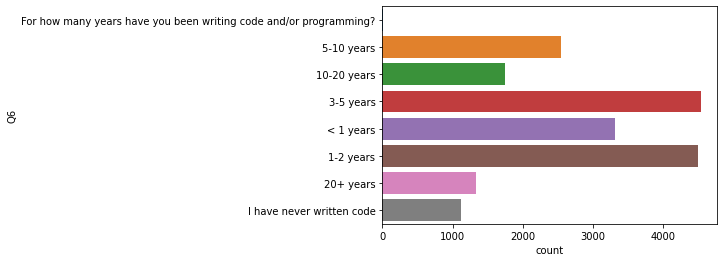

In [43]:
# 프로그래밍 경험
sns.countplot(y='Q6', data=respone)

5년 미만의 경험을 가진사람들이 대부분이며 3~5년의 경험을 가진 사람들이 많다

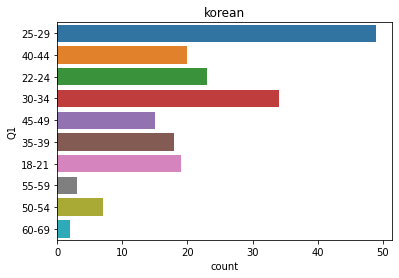

In [50]:
korea = respone.loc[(respone['Q3']=='South Korea')]
#print(korea.shape)# (190, 355) 190명의 한국사람들이 설문에 응했다
sns.countplot(y ='Q1', data=korea)
plt.title('korean')
plt.show()

참여한 한국사람들 중 25~29세의 캐글인이 많았다

In [52]:
pd.DataFrame(korea['Q2'].value_counts())

,Q2
Man,150
Woman,39
Prefer not to say,1


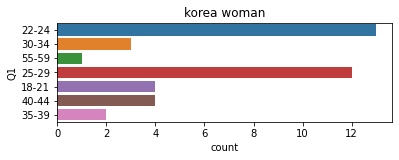

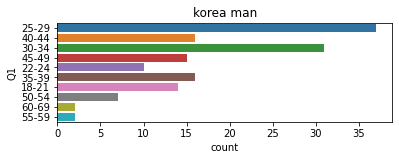

In [60]:
k_w = korea.loc[korea['Q2']=='Woman']
k_m = korea.loc[korea['Q2']=='Man']

plt.subplot(2,1,1)
sns.countplot(y='Q1',data=k_w)
plt.title('korea woman')
plt.show()

plt.subplot(2,1,2)
sns.countplot(y='Q1',data=k_m)
plt.title('korea man')
plt.show()

<AxesSubplot:>

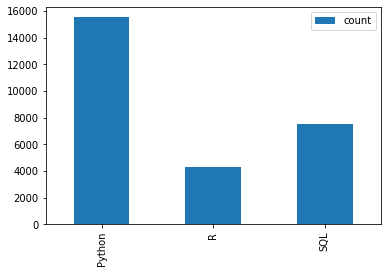

In [167]:
# 프로그래밍 언어
pro_lan = pd.DataFrame(respone[['Q7_Part_1','Q7_Part_2','Q7_Part_3']])
pro_lan = pro_lan.drop(pro_lan.index[0])
pro_lan.columns = ['python', 'R', 'SQL']

# pro_lan['python'] = pro_lan['python'].value_counts()
# pro_lan['R'] = pro_lan['R'].value_counts()
# pro_lan['SQL'] = pro_lan['SQL'].value_counts()
mypro = pd.DataFrame(pro_lan['python'].value_counts())
mypro.columns = ['count']

pro_02 = pd.DataFrame(pro_lan['R'].value_counts())
pro_03 = pd.DataFrame(pro_lan['SQL'].value_counts())

pro_02.columns = ['count']
pro_03.columns = ['count']
mypro = pd.concat([mypro,pro_02,pro_03])
mypro.plot.bar(y='count')


python을 많이 쓴다 

<AxesSubplot:xlabel='count', ylabel='count'>

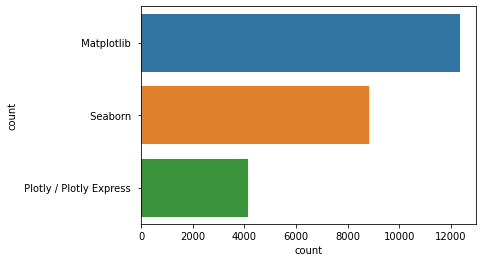

In [107]:
# 캐글인들은 data visualization 할 때 무엇을 많이 쓰는가
# tensorflow
visual01 = pd.DataFrame(respone['Q14_Part_1'].dropna())
# keras
visual02 = pd.DataFrame(respone['Q14_Part_2'].dropna())
# pytoch
visual03 = pd.DataFrame(respone['Q14_Part_3'].dropna())

visual01 = visual01.drop([visual01.index[0]])
visual02 = visual02.drop([visual02.index[0]])
visual03 = visual03.drop([visual03.index[0]])

visual01.columns =['count']
visual02.columns =['count']
visual03.columns =['count']

visual = pd.concat([visual01, visual02, visual03])
sns.countplot(y='count', data=visual)

visualization시 matplotlib을 많이 쓴다